In [1]:
                                          # Avocado Project
# Project Description
# This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
# The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
# Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
# The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g.greenskins) are not included in this table.
# Some relevant columns in the dataset:
# •	Date - The date of the observation
# •	AveragePrice - the average price of a single avocado
# •	type - conventional or organic
# •	year - the year
# •	Region - the city or region of the observation
# •	Total Volume - Total number of avocados sold
# •	4046 - Total number of avocados with PLU 4046 sold
# •	4225 - Total number of avocados with PLU 4225 sold
# •	4770 - Total number of avocados with PLU 4770 sold

# Inspiration /Label 
# The dataset can be seen in two angles to find the region and find the average price .
# Task: One of Classification and other of Regression
# Do both tasks in the same .ipynb file and submit at single file. 

# Dataset Link-
# •	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


In [4]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error

In [7]:
# load the dataset
url = "https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv.zip"
df = pd.read_csv(url, compression='zip')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [8]:
# Explore the dataset
df.head

<bound method NDFrame.head of        Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13  

In [9]:
df.shape

(18249, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [11]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [13]:
# Data preprocessing for classification
df_classification = df.copy()
df_classification['AveragePrice'] = np.where(df_classification['AveragePrice']>1.0,1,0)

In [15]:
# Encode categorical variables for Classification
label_encoder = LabelEncoder()
df_classification['type'] = label_encoder.fit_transform(df_classification['type'])
df_classification['region'] = label_encoder.fit_transform(df_classification['region'])

In [16]:
# split the data for classification
X_cls = df_classification[['type', 'year', 'region', 'Total Volume', '4046', '4225', '4225', '4770']]
y_cls = df_classification['AveragePrice']
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

In [17]:
# classification Model (Random Forest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_cls, y_train_cls)
y_pred_cls = clf.predict(X_test_cls)
accuracy_cls = accuracy_score(y_test_cls, y_pred_cls)
print(f'classification Accuracy: {accuracy_cls}')

classification Accuracy: 0.927945205479452


In [18]:
# Data Preprocessing for Regression
df_regression = df.copy()

In [20]:
# Encode categorical variables for Regression
df_regression = pd.get_dummies(df_regression, columns=['type', 'region'], drop_first=True)

In [21]:
# Split the data for Regression
X_reg = df_regression[['type_organic', 'year', 'region_Atlanta', 'region_BaltimoreWashington', 'region_Boise',
                      'region_Boston', 'region_BuffaloRochester', 'region_Charlotte', 'region_Chicago' ]]
y_reg = df_regression['AveragePrice']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [26]:
# Regression Model (linear regression)
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)
reg = LinearRegression()
reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_reg = reg.predict(X_test_reg_scaled)
mae_reg = mean_absolute_error(y_test_reg, y_pred_reg)
print(f'Regression Mean Absolute Error: {mae_reg}')

Regression Mean Absolute Error: 0.24207319896041488


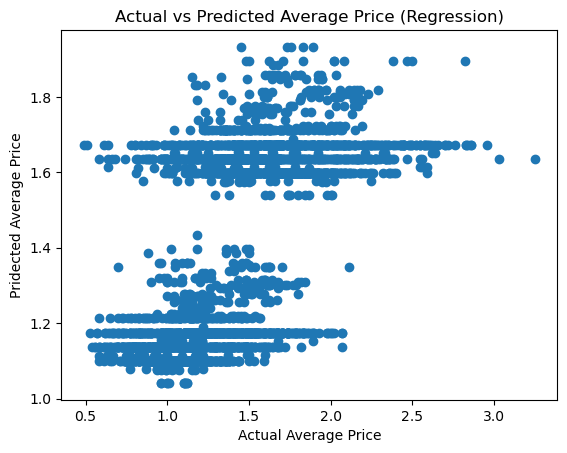

In [27]:
# Visualization for regression
plt.scatter(y_test_reg, y_pred_reg)
plt.xlabel("Actual Average Price")
plt.ylabel("Pridected Average Price")
plt.title("Actual vs Predicted Average Price (Regression)")
plt.show()